In [1]:
from face_alignment import FaceAlignment, LandmarksType

from loreal_poc.dataloaders.loaders import DataLoader300W
from loreal_poc.visualisation.draw import draw_marks
from loreal_poc.marks.facial_parts import FacialParts

import torch
from loreal_poc.tests.performance import NMEMean, NMEs, Es, MEMean, MEStd, NMEMean, NMEStd
from loreal_poc.models.wrappers import FaceAlignmentWrapper

Benchmark

In [2]:
ds = DataLoader300W(dir_path="300W/sample")

In [3]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

L'Oreal

In [4]:
model = FaceAlignmentWrapper(model=FaceAlignment(LandmarksType.TWO_D, device="cpu", flip_input=False))

In [5]:
prediction = model.predict(ds)
marks = ds.all_marks
for metric in [NMEMean, NMEs, MEMean, MEStd, NMEMean, NMEStd, Es]:
    print(f"{metric.__name__}:{metric.get(prediction, marks)}")

NMEMean:0.06233510979950631
NMEs:[0.07531859 0.08214728 0.0453659  0.05566845 0.05317534]
MEMean:12.172810987943965
MEStd:11.185152368023797
NMEMean:0.06233510979950631
NMEStd:0.013981365495877753
Es:[[12.64911064 13.98116651 17.64966983 27.96163264 26.88603439 27.2037963
  24.99632173 18.46327352 15.49091508 20.38655008 28.96824946 18.68070154
  21.00649238 23.34713518 18.78812417  8.91617704  3.15269091  9.84471132
   7.62599167  7.46495311  9.76452231 12.31256598  9.71432288  8.47259281
   4.12252787  3.64339539 10.99422539  4.90101469  9.26316129 10.76335747
   8.19016203  1.67062533  4.17529041  5.04662194  2.44197502  6.69321634
   5.4613892   1.78589613  5.436992    6.19588936  5.81028786  3.90036639
   7.06849355  4.17897894  2.98417158  7.79152681  7.53631647  6.44722553
   5.130614    5.64957945  4.64509042  6.76971801  8.64684104  5.60776471
   4.11845894  7.29749663  6.72116456  8.54999515 10.31351356 10.24740011
   6.52120334  9.54093418  6.00003675  7.30512594  4.84540535

In [6]:
prediction = model.predict(ds, facial_part=FacialParts.LEFT_EYE.value)
marks = ds.all_marks

print(FacialParts.LEFT_EYE.name)
for metric in [NMEMean, NMEs, MEMean, MEStd, NMEMean, NMEStd, Es]:
    print(f"{metric.__name__}:{metric.get(prediction, marks)}")

LEFT_EYE
NMEMean:0.03064837061887285
NMEs:[0.03639644 0.02607136 0.02883627 0.02288638 0.0390514 ]
MEMean:6.205209482416183
MEStd:3.7323675345101868
NMEMean:0.03064837061887285
NMEStd:0.006134046369089966
Es:[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
   5.4613892   1.78589613  5.436992    6.19588936  5.81028786  3.90036639
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan   

In [7]:
chosen_idx = 4
predictions = model.predict(ds)
image, ground_truth_landmarks, meta = ds[chosen_idx]
image, ground_truth_landmarks, meta = image[0], ground_truth_landmarks[0], meta[0]
loreal_landmarks = predictions.prediction[chosen_idx]

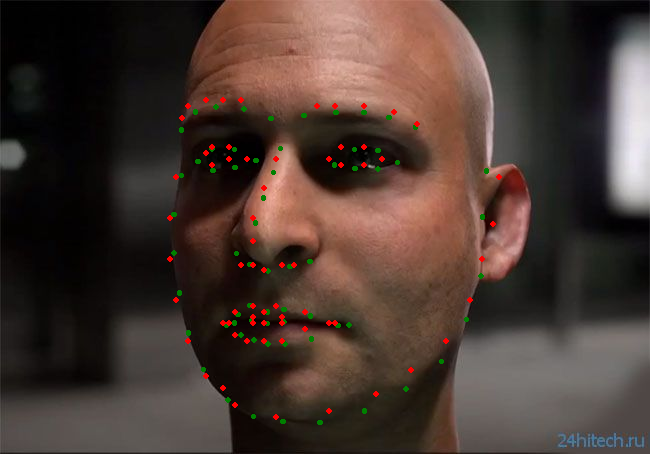

In [8]:
draw_marks(image, [ground_truth_landmarks, loreal_landmarks], ["green", "red"])